Clustering Covid 19 Indonesia menggunakan Kmeans

In [1]:
# Import Library

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
# mendefinisikan kolom dataset
class ColumnsData:
    date = 'Date'
    province = 'Province'
    island = 'Island'
    cases = 'Total Cases'
    deaths = 'Total Deaths'
    recovered = 'Total Recovered'
    actives_cases = 'Total Active Cases'
    population = 'Population'
    area = 'Area (km2)'
    mortality = 'Mortality'
    density = 'Population Density'
    

# membuat fungsi untuk split data dan bining data
def create_bin(df, columns, q=5):
    for column in columns:
        df[column] = pd.qcut(df[column], q, duplicates='drop').cat.codes
        

# membuat fungsi untuk normalisasi data
def normalisasi_data(df, columns):
    mnMaxScaler = MinMaxScaler()
    df[columns] = minMaxScaler.fit_transform(d[columns])
#     df[columns] = minMaxScaler.fit_transform(df[columns])

In [3]:
# Import dataset covid 19 indonesia
data = pd.read_csv('data/covid_19_indonesia_time_series_all.csv')

In [4]:
# membaca 10 data teratas
data.head().T

,0,1,2,3,4
Date,3/1/2020,3/2/2020,3/2/2020,3/2/2020,3/2/2020
Location ISO Code,ID-JK,ID-JK,IDN,ID-JB,ID-RI
Location,DKI Jakarta,DKI Jakarta,Indonesia,Jawa Barat,Riau
New Cases,2,2,2,3,1
New Deaths,0,0,0,0,0
New Recovered,0,0,0,0,0
New Active Cases,2,2,2,3,1
Total Cases,489,491,2,12,2
Total Deaths,20,20,0,5,1
Total Recovered,39,39,0,135,1


In [5]:
# membaca ukuran data
data.shape

(10694, 37)

In [6]:
data.fillna(method='ffill').fillna(method='bfill')

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,20,39,...,106.836118,-6.204699,0.18,45.09,0.00,1.84,4.09%,7.98%,1.00,1.00
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,20,39,...,106.836118,-6.204699,0.18,45.27,0.00,1.84,4.07%,7.94%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,1.00,1.00
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,5,135,...,107.603708,-6.920432,0.07,0.27,0.00,0.11,41.67%,1125.00%,1.00,1.00
4,3/2/2020,ID-RI,Riau,1,0,0,1,2,1,1,...,101.805109,0.511648,0.16,0.33,0.00,0.16,50.00%,50.00%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,1/21/2021,ID-SG,Sulawesi Tenggara,77,1,1,75,9016,172,7392,...,122.070311,-4.124689,29.22,3421.03,0.38,65.26,1.91%,81.99%,1.97,1.00
10690,1/21/2021,ID-SA,Sulawesi Utara,92,2,83,7,11931,361,8497,...,124.521240,1.259638,34.82,4516.10,0.76,136.64,3.03%,71.22%,0.39,1.00
10691,1/21/2021,ID-SB,Sumatera Barat,181,4,49,128,26091,577,18591,...,100.465062,-0.850253,32.79,4727.28,0.72,104.54,2.21%,71.25%,1.08,0.57
10692,1/21/2021,ID-SS,Sumatera Selatan,101,6,49,46,13437,652,10834,...,104.169465,-3.216212,12.29,1635.16,0.73,79.34,4.85%,80.63%,0.92,6.00


In [7]:
data.shape

(10694, 37)

In [8]:
data = data[[
    ColumnsData.date,
    ColumnsData.province,
    ColumnsData.island,
    ColumnsData.cases,
    ColumnsData.deaths,
    ColumnsData.recovered,
    ColumnsData.actives_cases,
    ColumnsData.population,
    ColumnsData.area,
    ColumnsData.density
]]

In [9]:
data.isnull().sum()

Date                    0
Province              326
Island                326
Total Cases             0
Total Deaths            0
Total Recovered         0
Total Active Cases      0
Population              0
Area (km2)              0
Population Density      0
dtype: int64

In [10]:
data = data.dropna(axis=0, how="any")

In [11]:
data.isnull().sum()

Date                  0
Province              0
Island                0
Total Cases           0
Total Deaths          0
Total Recovered       0
Total Active Cases    0
Population            0
Area (km2)            0
Population Density    0
dtype: int64

In [13]:
data[ColumnsData.date] = pd.to_datetime(data.Date, infer_datetime_format=True).dt.date

In [14]:
data[ColumnsData.mortality] = data[ColumnsData.deaths] / data[ColumnsData.cases]

In [15]:
data.head().T

,0,1,3,4,5
Date,2020-03-01,2020-03-02,2020-03-02,2020-03-02,2020-03-03
Province,DKI Jakarta,DKI Jakarta,Jawa Barat,Riau,DKI Jakarta
Island,Jawa,Jawa,Jawa,Sumatera,Jawa
Total Cases,489,491,12,2,493
Total Deaths,20,20,5,1,20
Total Recovered,39,39,135,1,39
Total Active Cases,430,432,-128,0,434
Population,10846145,10846145,45161325,6074100,10846145
Area (km2),664,664,35378,87024,664
Population Density,16334.3,16334.3,1276.55,69.8,16334.3


In [16]:
dfl = data[[ColumnsData.date, ColumnsData.cases, ColumnsData.deaths, 
            ColumnsData.recovered]].groupby(ColumnsData.date).sum().reset_index()

dfl = dfl[(dfl[ColumnsData.cases] >= 100)].melt(id_vars=ColumnsData.date,
                                    value_vars=[ColumnsData.cases, 
                                    ColumnsData.deaths, ColumnsData.recovered])

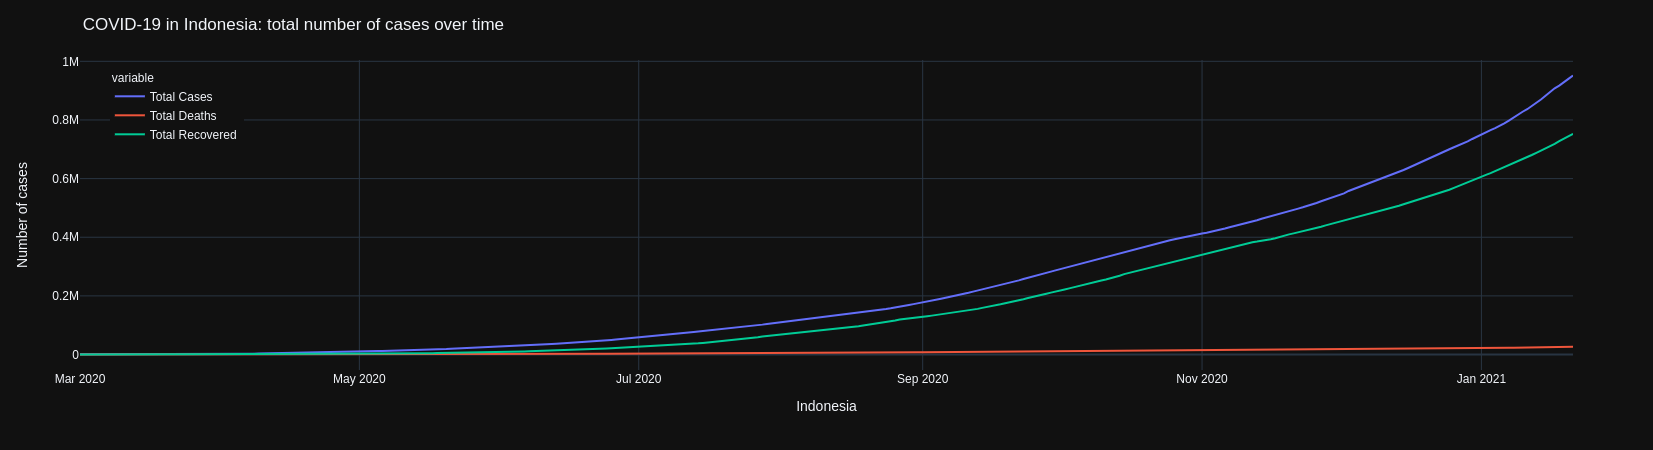

In [21]:
vis_lp = px.line(dfl, x=ColumnsData.date, y='value', color='variable', template="plotly_dark")
vis_lp.update_layout(title='COVID-19 in Indonesia: total number of cases over time',
                     xaxis_title='Indonesia', yaxis_title='Number of cases',
                     legend=dict(x=0.02, y=0.98))
vis_lp.show()

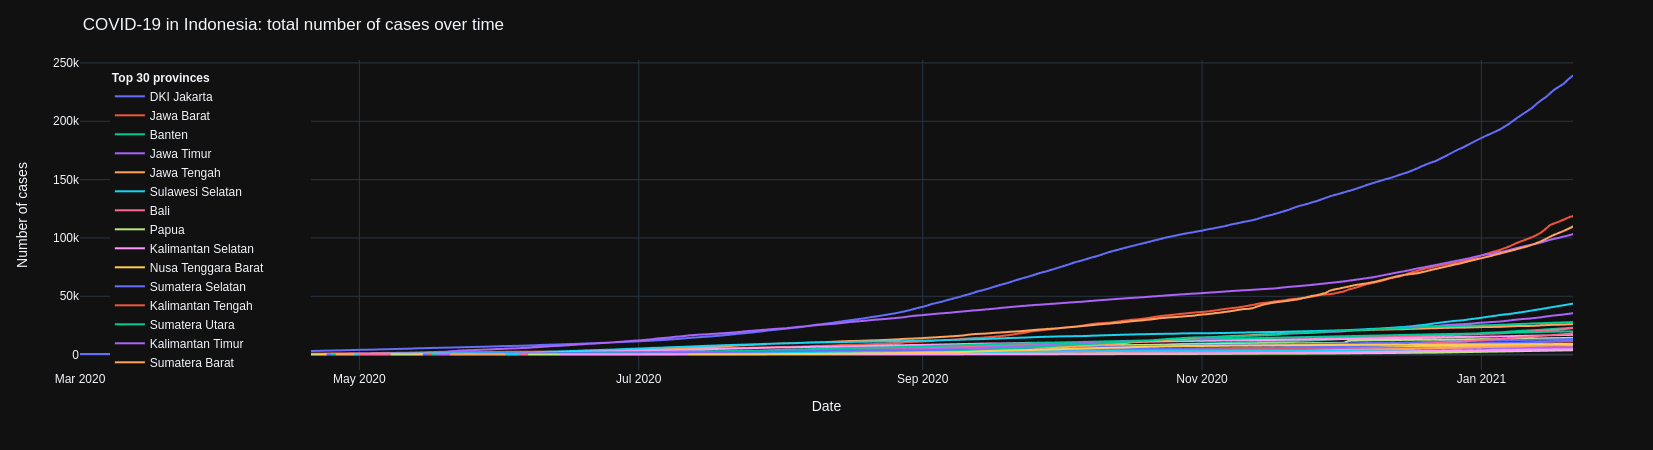

In [24]:
pd.options.mode.chained_assignment = None
limit = 30
group = data.groupby(ColumnsData.province)
t = group.tail(1).sort_values(ColumnsData.cases, ascending=False).set_index(ColumnsData.province).drop(
    columns=[ColumnsData.date])

s = data[(data[ColumnsData.province].isin([i for i in t.index[:limit]]))]
s = s[(s[ColumnsData.cases] >= 100)]

# vis_lp = visualization line plot
vis_lp2 = px.line(s, x=ColumnsData.date, y=ColumnsData.cases, color=ColumnsData.province, template="plotly_dark")
vis_lp2.update_layout(title='COVID-19 in Indonesia: total number of cases over time',
                      xaxis_title=ColumnsData.date, yaxis_title='Number of cases',
                      legend_title='<b>Top %s provinces</b>' % limit,
                      legend=dict(x=0.02, y=0.98))
vis_lp2.show()
